<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2024/blob/main/notes/25-reducibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 25: Reducibility

## The halting problem

Now that we've proven that one language ($A_{\mathsf{TM}}$) is undecidable, we can use it to prove that other languages are undecidable.

<div class="alert alert-info">
    <p><b>Read</b> pages 215–217, up to "via the diagonalization method."</p>
</div>    

The first example is the halting problem $\mathit{HALT}_{\mathsf{TM}}$. In many textbooks, the halting problem is actually the prototypical undecidable language, and is proven undecidable using diagonalization.
For fun, you can read ["Scooping the Loop Snooper"](http://www.lel.ed.ac.uk/~gpullum/loopsnoop.html), a proof of the undecidability of the halting problem in the style of Dr. Seuss.

Sipser, however, proves that the halting problem is undecidable by _reducing from_ $A_{\mathsf{TM}}$.
To prove that the halting problem is undecidable, you assume that it *is* decidable, that is, there is a TM $R$ that decides it. Then, you show that armed with such a TM, you could implement another TM, $S$, that decides $A_{\mathsf{TM}}$, which is a contradiction because we know that $A_{\mathsf{TM}}$ is undecidable.

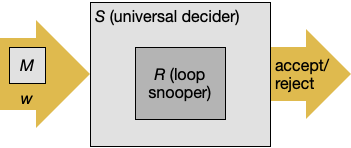

It's _very_ important to remember that the direction of the reduction is the opposite of what most people intuitively think of first. If you want to show that the halting problem is undecidable, you do _not_ reduce the halting problem to $A_{\mathsf{TM}}$; you reduce $A_{\mathsf{TM}}$ to the halting problem. To avoid confusion (and, you will see that the potential for confusion grows below), we give a nickname to each TM to help you remember which is which. Call $R$ the "loop snooper," in homage to Pullum, and $S$ the "universal decider" (because it's a universal TM but it always halts).

So, suppose that we had a TM $R$ (the loop snooper) that decides the halting problem $\mathit{HALT}_{\mathsf{TM}}$. Then, designing a universal decider $S$ would be easy: $S =$ "On input $\langle M, w\rangle$,

1. Use the loop snooper $R$ to check whether $M$ loops on $w$.
2. If a loop is detected, *reject*.
3. If no loop is detected, we can safely simulate $M$ on $w$.
4. If it accepts, *accept*.
5. If it rejects, *reject*.

But last time we showed that the universal decider $S$ does not exist. Therefore, the loop snooper $R$ cannot exist either.

### Undecidable problems about programs

The halting problem is one example of a problem about programs, and now we turn to other problems about programs. A "program" might be a Turing machine, a Python program, or some other more exotic sort of computing device. It may or may not read an input string.

We want to show that it is undecidable whether some program $P$ has some property $\phi$. We want to do so by reduction from $A_{\textsf{TM}}$; sometimes the reduction is from some other language (e.g., Theorem 5.4), but $A_{\textsf{TM}}$ is really very useful and it will be $A_{\textsf{TM}}$ most of the time.

The proof goes like this: Assume that there is some TM $R$ that can decide whether program $P$ has property $\phi$. Then, we want to use $R$ to implement a "universal decider" $S$, that is, a TM that decides $A_{\textsf{TM}}$. That implementation usually has three steps:

$S =$ "On input $\langle M, w\rangle$:

1. Convert $\langle M, w\rangle$ into a program $P$.
2. Run $R$ on $P$.
3. If $R$ accepts, *accept*; if $R$ rejects, *reject*.

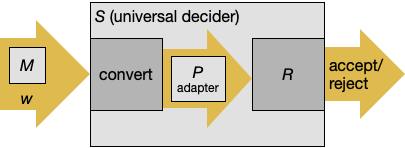

Let me say a little more about these three steps in reverse order.

In our reduction from $A_{\textsf{TM}}$ to the halting problem, step 3 was more complex than this. But usually it's very simple, like the above. (In fact, there is a more restricted notion of reduction (Section 5.3) that requires that step 3 to be the above.) Sometimes (like Theorem 5.2 below), it will be flipped: If $R$ accepts, *reject*; if $R$ rejects, *accept*.

Step 2 is always "Run $R$ on $P$", without exception as far as I know.

In our reduction from $A_{\textsf{TM}}$ to the halting problem, step 1 was trivial ($\langle M, w \rangle$ maps to itself), but in general, step 1 really has to do something. It has to change the TM+string $\langle M, w\rangle$ into $P$, which acts as an "adapter" between the property we want to detect (whether $M$ accepts $w$) into the property that $R$ able to detect ($\phi$).

When $P$ is another Turing machine, step 1 involves creating a _third_ TM besides $R$ and $S$. Since it can be hard to keep track of so many TMs, I think it's helpful to start with an example problem about something other than Turing machines.

### A problem about Python programs

Let's show that it is undecidable whether a given Python program $P$ deletes any files. It would be great for security if this were decidable, but unfortunately it's not.

Suppose, for the sake of contradiction, that this is decidable. That is, there exists a TM $R$ that accepts a Python program $P$ if and only if $P$ would delete any files. Let's call $R$ the "clobber-stopper."

We're going to build a universal decider $S$ that somehow uses the clobber-stopper $R$ to decide $A_{\mathsf{TM}}$. We can't feed $\langle M, w\rangle$ to the clobber-stopper $R$ because $R$ wants a Python program. So we need to convert $M$ and $w$ into a Python program.


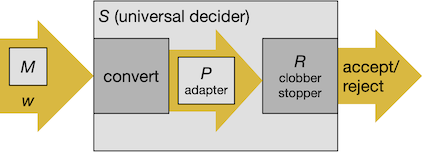

We assume a Python function `simulate` that simulates a TM and returns `True` for accept or `False` for reject; this function can also potentially loop. It should be obvious that such a function exists, although it's long enough that we don't bother to write it out. Then the universal decider can be implemented as $S = $ “On input $\langle M, w\rangle$:

1. Construct the Python program, called $P$:
```
    import os
    if simulate(M, w):
        os.system("rm -rf *")
```
where `M` and `w` are filled in with data structures representing $M$ and $w$, respectively.
2. Run $R$, the clobber-stopper, on $P$.
3. If $R$ detected deletion of a file, then _accept_.
4. Otherwise, _reject_.

To see that $S$ is a universal decider, let's walk through the possible cases:
- If $M$ accepts $w$, then $P$ would wipe out your files. $R$ detects this, and so $S$ accepts.
- If $M$ rejects $w$, then $P$ does not wipe out your files. $R$ does not detect any writes, and so $S$ rejects.
- Similarly, if $M$ loops on $w$, then $P$ would run forever but would not wipe out your files. $R$ does not detect any deletions, and so $S$ rejects.

Thus $S$ decides $A_{\mathsf{TM}}$ as desired, which is a contradiction. We conclude that it's undecidable whether a given Python program deletes any files.

### The "adapter"

In general, when you're trying to prove that detecting property $\phi$ is undecidable, the program $P$ usually has to do the following things:

- Simulate $M$ on $w$.
- If $M$ accepts, then exhibit property $\phi$.
- If $M$ rejects, then don't exhibit property $\phi$.
- You must also set it up so that if $M$ loops, property $\phi$ is not exhibited.

**Question.** Try Problem 5.12: Show that it is undecidable, given a Turing machine $M$, whether there is any input $w$ for which $M$ ever erases a symbol (that is, overwrites a non-blank symbol with a blank symbol).